## Linear Regression
Linear regression is a a method of trying to fit data on a line, a plane or a multidimensional plane. We predict the dependents values(**response variable**) using the independent variable (**predictors or features**). When we have one feature, the regression equation is
$$\hat{y}=a_1\hat{x}_1+a_0$$
and the metric measuring the score of the model is the loss function (Mean Squared error)

$$MSE=\dfrac{1}{N}\sum_{i=1}^n(y-\hat{y})^2$$. In this case, the regression line is called **a simple linear regression**.

When, we have more than one variable, we refer to the methods as multiple regression. The corresponding regression equaion is

$$\hat{y}=a_n\hat{x}_n+a_{n-1}\hat{x}_{n-1}+\ldots +a_1\hat{x}_1+a_0$$.

The parameters of a linear regression are the **coefficients**, $\{a_n,a_{n-1},\ldots,a_1\}$ and the **intercept**, $a_0$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
data=fetch_california_housing()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

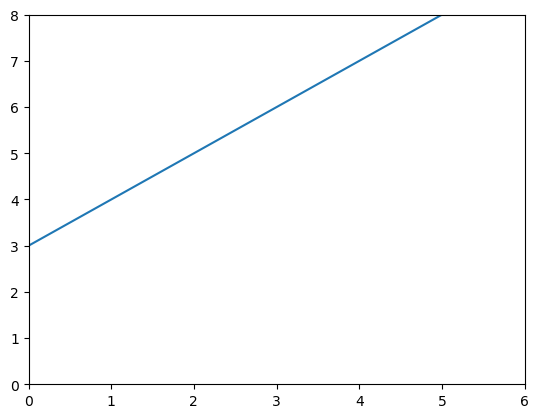

In [4]:
plt.plot([0,1,2,3,4,5],[3,4,5,6,7,8])
plt.ylim([0,8]);
plt.xlim([0,6]);

## Data Aquisition

In [5]:
housing_df=pd.read_csv('housing.csv')
house_df=housing_df.copy()
house_df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


## Data Exploration

In [6]:
house_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Total_bedrooms has a missing values.** We drop the rows or impute it using simpleImputer module

In [8]:
#house_df.dropna(axis=0,inplace=True)

## Combining columns and drop unnecessary ones
Combine the columns as shown

* median_income per household =med_income_per_hse
* population per household = pop_per_hse
* total_rooms per household = room_per_hse
* total_bedrooms per household = bedrm_per_hse

In [9]:
house_df.iloc[:,:-1].corr()[['median_house_value']]

,median_house_value
longitude,-0.045967
latitude,-0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049686
population,-0.024650
households,0.065843
median_income,0.688075
median_house_value,1.000000


In [10]:
house_df['med_income_per_hse']=house_df['median_income']/house_df['households']
house_df['pop_per_hse']=house_df['population']/house_df['households']
house_df['room_per_hse']=house_df['total_rooms']/house_df['households']
house_df['bedrm_per_hse']=house_df['total_bedrooms']/house_df['households']

In [11]:
house_df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,med_income_per_hse,pop_per_hse,room_per_hse,bedrm_per_hse
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.066073,2.555556,6.984127,1.02381
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.007295,2.109842,6.238137,0.97188


In [12]:
drop_columns=['longitude','latitude','total_rooms','total_bedrooms', 'population', 'households']
house_df.drop(drop_columns,axis=1,inplace=True)

In [13]:
X=house_df[['housing_median_age','median_income','med_income_per_hse','pop_per_hse','room_per_hse','bedrm_per_hse','ocean_proximity']]
y=house_df['med_income_per_hse']  

**impute the the dataframe using the median statistics**

In [14]:
#check if you have null values
house_df.isnull().sum()

housing_median_age      0
median_income           0
median_house_value      0
ocean_proximity         0
med_income_per_hse      0
pop_per_hse             0
room_per_hse            0
bedrm_per_hse         207
dtype: int64

In [15]:
house_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

**split data to train and test before scaling**

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
pipe_transf_num=Pipeline([('imputer',SimpleImputer(strategy='median')),
                         ('scaler', StandardScaler())   
])

In [21]:
y_train.shape

(16512,)

In [22]:
pipe_transf_num

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [23]:
num_features=['housing_median_age','median_income','med_income_per_hse','pop_per_hse','room_per_hse','bedrm_per_hse']
categ_features=['ocean_proximity']

In [24]:
pipe_trans_all=ColumnTransformer([('numerical_transf',pipe_transf_num,num_features),
                               ('categorical_transf',OneHotEncoder(),categ_features),    
                                 ])

In [26]:
#We have a transformed train data. We cam now use it to train the model
X_transformed=pipe_trans_all.fit_transform(X_train)

In [27]:
from sklearn.linear_model import LinearRegression, LogisticRegression


In [28]:
lin_reg=LinearRegression()
lin_reg.fit(X_transformed,y_train)


LinearRegression()

In [29]:
#r^2 score
lin_reg.intercept_

0.016115555496973848

In [30]:
lin_reg.coef_

array([-9.32457726e-18, -6.24564784e-17,  1.31573311e-01, -8.53614185e-17,
        2.54872811e-17,  2.99154801e-17, -5.94555172e-17,  1.87108371e-17,
        5.62943729e-18,  4.14124606e-17, -6.99218289e-18])

In [31]:
X_test_transformed=pipe_trans_all.fit_transform(X_test)
y_pred=lin_reg.predict(X_test_transformed)
y_pred.size

4128

In [32]:
from sklearn import metrics

In [33]:
#this measures the average deviation of the predicted value from the mean.
mse=metrics.mean_squared_error(y_test,y_pred)
mse

0.007660558475238155

In [34]:
#we can also find its Std dev counterpart
rmse=np.sqrt(mse)
rmse

0.08752461639583549

## Logistic regression
Logistics regression is a method of classifying outcomes and also determining the chances of an item being located in a given class. A single variable logistic regression model is given by 
$$y=\dfrac{1}{1+e^{-\left(a_1x_1+a_0\right)}}.$$

When we have more than one independent variable, the model becomes
$$y=\dfrac{1}{1+e^{-\left(a_n\hat{x}_n+a_{n-1}\hat{x}_{n-1}+\ldots +a_1\hat{x}_1+a_0\right)}}.$$

Let us use the data the income data


In [61]:
income_data=pd.read_csv('income_data.csv')
income_df=income_data.iloc[:,1:]

In [62]:
income_df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Total_income,Age,Years_employed
0,1,1,1,1,0,0,0,0,2,427500.0,32.868574,12.435574
1,1,1,1,0,0,0,0,0,2,112500.0,58.793815,3.104787
2,0,0,1,0,1,1,0,0,1,270000.0,52.321403,8.353354
3,0,0,1,0,0,0,1,0,1,283500.0,61.504343,0.000000
4,1,1,1,1,1,1,0,0,2,270000.0,46.193967,2.105450


**Find the median of the three columns and categorize the values above the median as 1 and those below as 0**

In [68]:
def binary_col_categorizer(dataframe,col_name):
    for col in col_name:
        dataframe[col]=(dataframe[col]> dataframe[col].median()).apply(lambda x: int(x))
    return dataframe

In [69]:
columns_list_cat=['Num_family','Total_income','Age','Years_employed'] 

In [70]:
#carry out the transformation
binary_col_categorizer(income_df,columns_list_cat)

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Total_income,Age,Years_employed
0,1,1,1,1,0,0,0,0,0,1,0,1
1,1,1,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,1,1,1
3,0,0,1,0,0,0,1,0,0,1,1,0
4,1,1,1,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,0,0,0,0,1,1,0
9705,0,0,1,1,1,0,0,0,0,0,1,1
9706,1,1,1,0,0,0,0,0,0,0,1,1
9707,0,0,1,0,1,1,0,0,0,0,0,0


In [72]:
income_df.head()
## predict if total income is more than the median total income.
y=income_df['Total_income']

In [73]:
X=income_df.drop('Total_income',axis=1)

In [84]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
y2_train.size

7767

In [86]:
log_reg=LogisticRegression()
log_reg.fit(X2_train,y2_train)

LogisticRegression()

In [88]:
y_predlog=log_reg.predict(X2_test)

**metrics**
We use different metrics in classification problem than those used in linear regression. Consider a case of classifying if a person is infected with Malaria(1) or not(0). Assume that we have 120 being tested. Consider the following table.


||Actual Positive|Actual Negative|Actual Total|
|:--------|:-------|:---------|:----------|
|Predicted Positive|   TP=87 |    FP=9 |    Total Predicted Positive = 96|
 |Predicted Negative|  FN =6  | TN=8     |  Total Predicted Negative = 96|
 ||Total actual positive=93|Total Actual Negative=17|Actual Total|

The **True Positives(TP)** are those identified correctly as being infected while **True Negatives (TN)** are those identified correctly as being as being not infected. The **False Positives (FP)** are the uninfected patients identified incorrectly by the model that they are infected while the **False Negative (FN)** are the infected patients identified by the model as being uninfected. 

**Accuracy** 

Is a measure of how best the model predicts the infected and the uninfected cases
$$Accuracy =\dfrac{TP + TN}{TP+FP+FN+TN}$$

**Recall** 

Is a measure of how well the model identified the infected cases from a poole of all actual infected cases
$$Recall =\dfrac{TP }{TP+FN}$$

**Precision** 

Is a measure of how well the model differentiates the actual infected cases from the actual uninfected cases
$$Precision =\dfrac{TP }{TP+FN}$$

**f1_Score** 

This is a trade-in between precision and recall. It measures the harmonic mean of the two cases. It provide means of considering the importance of the two measures at the same time.

$${f1 \_ score} =\dfrac{2}{\frac{1}{Recall}+\frac{1}{Precision}}$$

**Receiver Operating Characteristic(ROC)** 

It is the graph showing the True Positive against the False Positive. The area under this graph represents a measure of how the model does well in correctly identifying the true cases against the positive cases that are inaccurate grouped.  

In [29]:
from sklearn import metrics

In [97]:
metrics.recall_score(y2_test,y_predlog) #recall

0.5175824175824176

In [98]:
metrics.precision_score(y2_test,y_predlog) #precision

0.6108949416342413

In [99]:
metrics.f1_score(y2_test,y_predlog) #f1_score

0.5603807257584772

In [96]:
metrics.confusion_matrix(y2_test,y_predlog)

array([[732, 300],
       [439, 471]], dtype=int64)

In [110]:
metrics.accuracy_score(y2_test,y_predlog)

0.6194644696189495

In [100]:
metrics.roc_auc_score(y2_test,y_predlog)#the area under the graph of ROC curve

0.6134423715819064

In general, the roc_auc_score is slightly more than 0.5 implying that the model is not very accurate in its prediction. A different model would do better.


#### Probability scores
This provides the probability of scoring a 0 verses scoring a 1

In [103]:
log_reg.predict_proba(X2_test)

array([[0.52692615, 0.47307385],
       [0.45349285, 0.54650715],
       [0.39324885, 0.60675115],
       ...,
       [0.58444953, 0.41555047],
       [0.29331709, 0.70668291],
       [0.53592183, 0.46407817]])

In [106]:
pd.DataFrame(log_reg.predict_proba(X2_test)).mean()

0    0.535399
1    0.464601
dtype: float64

In summary, there is an average of 0.53 chance of a block having less the median income and 0.46 chance of having more than the median income